In [1]:
import pickle
import torch
import cv2
import numpy as np
import pandas as pd
from utils import Preprocessing

In [2]:
filename = '../data/fer2013/file_cpu.pkl'

In [3]:
#data = pickle.load(open( filename, "rb" ) )

In [4]:
data = torch.load(filename, map_location='cpu')

In [5]:
data.shape

torch.Size([28709, 2304])

In [6]:
from image_utils import ImageConverter
import matplotlib.pyplot as plt

In [7]:
img_conv = ImageConverter()

In [8]:
data_np = data.detach().numpy()

In [9]:
image_0 = img_conv.reshape_array_to_frame(data_np[0])
image_1 = img_conv.reshape_array_to_frame(data_np[1])

In [14]:
newimg0 = cv2.resize(image_0,(int(224),int(224)), interpolation = cv2.INTER_CUBIC)
newimg1 = cv2.resize(image_1,(int(224),int(224)), interpolation = cv2.INTER_CUBIC)

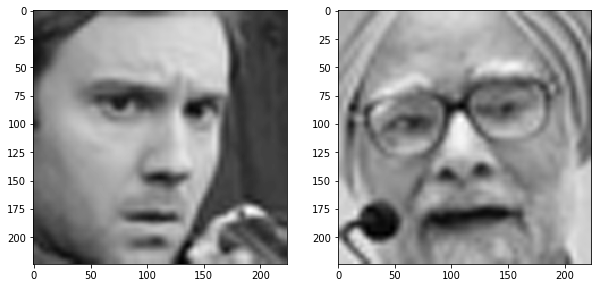

In [15]:
plt.figure(1, figsize=(10, 5))
plt.subplot(1,2, 1)
plt.imshow(newimg0, cmap='gray', interpolation='none')
plt.subplot(1,2, 2)
plt.imshow(newimg1, cmap='gray', interpolation='none')
plt.show()

In [16]:
prep = Preprocessing('fer2013')

In [17]:
prep.load_data('fer2013.csv', name='alldata').tail()

,emotion,pixels,Usage
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


In [18]:
pixels=prep.get(name='alldata')['pixels']
pixels = pixels.str.split(' ', n=48*48, expand = True)
pixels.tail()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
35882,50,36,17,22,23,29,33,39,34,37,...,216,215,216,217,221,222,220,223,221,216
35883,178,174,172,173,181,188,191,194,196,199,...,147,141,136,118,66,7,0,0,0,0
35884,17,17,16,23,28,22,19,17,25,26,...,190,179,193,193,194,170,148,154,133,113
35885,30,28,28,29,31,30,42,68,79,81,...,30,27,27,26,28,35,35,35,30,28
35886,19,13,14,12,13,16,21,33,50,57,...,224,217,209,195,151,99,146,189,199,201


In [19]:
data = pixels.values
data.shape

(35887, 2304)

In [20]:
new_data = np.zeros(shape=[data.shape[0], 224*224])
for i in range(data.shape[0]):
    image = data[i].reshape(48, 48)
    newimg = cv2.resize(np.float32(image),(int(224),int(224)), interpolation = cv2.INTER_CUBIC)
    new_data[i] = newimg.reshape(1, 224*224)

In [21]:
new_data.shape

(35887, 50176)

In [22]:
new_data

array([[ 69.29178619,  69.50196838,  70.86005402, ...,  86.67406464,
         83.4406662 ,  82.94211578],
       [151.09681702, 151.08055115, 150.97834778, ..., 183.64863586,
        183.72528076, 183.7355957 ],
       [232.86798096, 232.59066772, 230.85047913, ..., 149.81462097,
        154.56208801, 155.29862976],
       ...,
       [ 16.87959099,  16.88157272,  16.89532089, ..., 106.76311493,
        104.11452484, 103.70207977],
       [ 30.20542717,  30.17092133,  29.94767189, ...,  27.94211388,
         27.7106514 ,  27.67416573],
       [ 20.06008339,  19.93674469,  19.13722038, ..., 201.98468018,
        201.97174072, 201.97061157]])

In [23]:
new_data_round = new_data.astype(int)

In [24]:
new_data_round

array([[ 69,  69,  70, ...,  86,  83,  82],
       [151, 151, 150, ..., 183, 183, 183],
       [232, 232, 230, ..., 149, 154, 155],
       ...,
       [ 16,  16,  16, ..., 106, 104, 103],
       [ 30,  30,  29, ...,  27,  27,  27],
       [ 20,  19,  19, ..., 201, 201, 201]])

In [25]:
new_data_df = pd.DataFrame(new_data_round)
new_data_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,50166,50167,50168,50169,50170,50171,50172,50173,50174,50175
35882,51,51,50,48,46,43,39,34,29,24,...,222,222,221,220,219,218,217,217,216,216
35883,178,178,177,176,175,175,174,173,172,171,...,0,0,0,0,0,0,0,0,0,0
35884,16,16,16,16,17,17,17,16,16,15,...,143,138,132,125,119,114,110,106,104,103
35885,30,30,29,29,29,28,28,27,27,27,...,32,31,30,29,28,28,28,27,27,27
35886,20,19,19,17,16,14,13,12,12,12,...,203,202,201,202,202,202,202,201,201,201


In [26]:
new_data_df['emotion'] = prep.get(name='alldata')['emotion']
new_data_df['Usage'] = prep.get(name='alldata')['Usage']
new_data_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,50168,50169,50170,50171,50172,50173,50174,50175,emotion,Usage
35882,51,51,50,48,46,43,39,34,29,24,...,221,220,219,218,217,217,216,216,6,PrivateTest
35883,178,178,177,176,175,175,174,173,172,171,...,0,0,0,0,0,0,0,0,3,PrivateTest
35884,16,16,16,16,17,17,17,16,16,15,...,132,125,119,114,110,106,104,103,0,PrivateTest
35885,30,30,29,29,29,28,28,27,27,27,...,30,29,28,28,28,27,27,27,3,PrivateTest
35886,20,19,19,17,16,14,13,12,12,12,...,201,202,202,202,202,201,201,201,2,PrivateTest


In [27]:
new_data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,50168,50169,50170,50171,50172,50173,50174,50175,emotion,Usage
0,69,69,70,73,75,78,80,83,84,85,...,114,111,105,99,92,86,83,82,0,Training
1,151,151,150,150,150,150,150,149,148,147,...,184,182,182,182,183,183,183,183,0,Training
2,232,232,230,229,229,227,221,209,196,182,...,105,115,125,134,142,149,154,155,2,Training
3,23,23,24,25,27,28,30,32,34,35,...,142,142,141,141,141,141,141,141,4,Training
4,4,4,4,3,2,1,0,0,0,0,...,28,28,29,29,29,29,30,30,6,Training


In [28]:
del new_data, new_data_round, data, pixels

In [29]:
train = new_data_df.loc[new_data_df['Usage'] == 'Training']

In [30]:
train.tail()

,0,1,2,3,4,5,6,7,8,9,...,50168,50169,50170,50171,50172,50173,50174,50175,emotion,Usage
28704,83,83,83,84,84,84,84,85,85,85,...,218,212,209,205,203,200,199,198,2,Training
28705,114,114,113,113,113,112,112,112,112,112,...,175,190,202,211,218,224,229,230,0,Training
28706,72,72,73,75,76,78,79,81,83,84,...,186,186,186,186,186,186,186,186,4,Training
28707,221,221,222,224,226,228,228,226,226,225,...,136,135,135,134,134,133,133,133,0,Training
28708,194,194,195,195,196,197,198,200,201,202,...,12,17,22,27,32,37,39,40,4,Training


In [ ]:
train = train.drop(columns = ['Usage'])
train.tail()

In [ ]:
train.to_csv('DatasetA_224.csv', index=False)

In [ ]:
print('train saved')

In [ ]:
print('train saved')

In [ ]:
train.info()

In [ ]:
public_test = new_data_df.loc[new_data_df['Usage'] == 'PublicTest']

In [ ]:
public_test = public_test.drop(columns = ['Usage'])
public_test.tail()

In [ ]:
prep.set(name='test_public_norm_224', value = )

In [ ]:
prep.save(name='test_public_norm_224')

In [ ]:
private_test = new_data_df.loc[new_data_df['Usage'] == 'PrivateTest']

In [ ]:
prep.set(name='test_private_norm_224', value = private_test.drop(columns = ['Usage']))

In [ ]:
prep.save(name='test_private_norm_224')

In [ ]:
prep.set(name='DatasetA_224', value = )
prep.save(name='DatasetA_224')